In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
from geopy import distance
import math
import matplotlib as mpl

In [2]:
def do_star_graph_series(series,node_color='pink',font_color='black',mode='node',title='',save_under=''):
    labs = ['']+list(series.index)
    labs = dict(zip(labs,labs))
    g = nx.DiGraph()
    i = 1
    g.add_star(['']+list(series.index))

    pos = nx.layout.spring_layout(g)
    if 0 in series:
        print("hi")
    if mode=='both':
        
        node_sizes = [100]+list(series.values.ravel())
        edge_colors =list(map(math.log,series.values.ravel()))    
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    # edge_colors=range(2,g.number_of_edges()+2 )
    elif mode=='edge':
        edge_colors =list(map(math.log,series.values.ravel()))
        nodes = nx.draw_networkx_nodes(g,pos,node_color=node_color)
        node_sizes = [100]+list(series.values.ravel())

        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)
    elif mode=='node':
        node_sizes = [100]+list(series.values.ravel())
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2)

    labels = nx.draw_networkx_labels(g,pos,labels=labs,font_color=font_color)



    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(14,10)
    
    plt.title(title)
    if len(save_under) > 0 :
        plt.savefig(save_under)
    plt.show()

In [3]:
data = pd.read_csv('openfoodfacts.csv',delimiter='\t',low_memory = False)
distance_df = pd.read_csv('data/DistancePerProduct.csv')
dico = pd.read_csv("data/Destination-Coordinate-MAN.csv")


In [15]:
dico = dico[["destination","country"]]

dico_d = dict(zip(dico["destination"],dico["country"]))

In [4]:
# data['code'] = data['code'].apply(lambda x : x.strip('0'))
# data.set_index('code',inplace=True)
distance_df.set_index('Unnamed: 0',inplace=True)
distance_df.index.name = ''



In [19]:
z = data.join(distance_df).dropna(subset=['distance'])

In [20]:
z.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,Unnamed: 0,distance
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,0.0 km
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,0.0 km
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,2370.413699903153 km
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0,2370.413699903153 km
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,971.5166387817493 km


In [21]:
## Explode the categroies...
explode = z['categories_en'].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
explode = explode.reset_index().set_index('level_1')
explode = explode.drop(['level_0'],axis=1)
explode.index.name=''
explode.head()

,0
,
11,Pies
17,Plant-based foods and beverages
46,Plant-based foods and beverages
48,Seafood
106,Dietary supplements


In [22]:
merged = explode.join(z)
merged

,0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,Unnamed: 0,distance
11,Pies,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.0,7734.861776902698 km
11,Sweet pies,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.0,7734.861776902698 km
11,Coconut pies,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.0,7734.861776902698 km
17,Plant-based foods and beverages,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,Plant-based foods,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,Fruits and vegetables based foods,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,Desserts,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,Fruits based foods,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,Compotes,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km
17,fr:Compotes de poire,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0,0.0 km


In [23]:
largest = explode[explode[0].apply(lambda x : not x.startswith('en:'))][0].value_counts().nlargest(10)

Plant-based foods and beverages


C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-------------


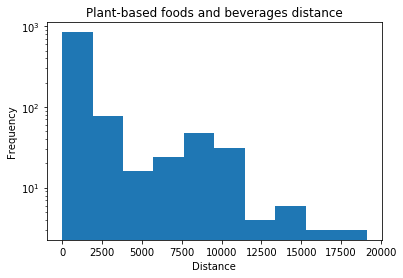

Plant-based foods
-------------


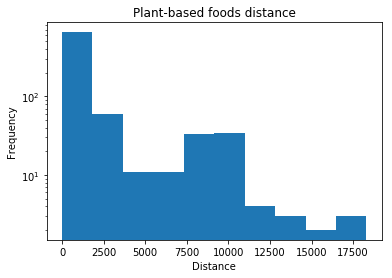

Sugary snacks
-------------


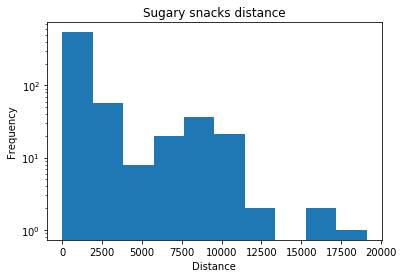

Beverages
-------------


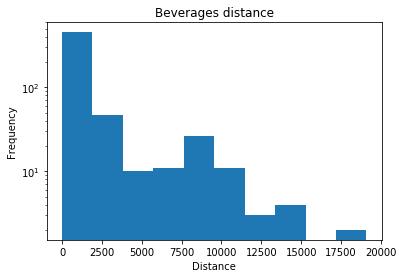

Non-Alcoholic beverages
-------------


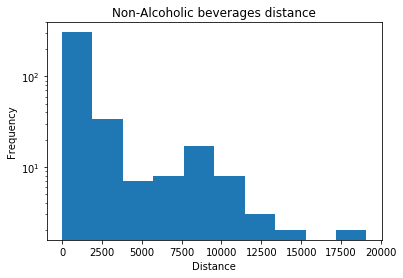

Groceries
-------------


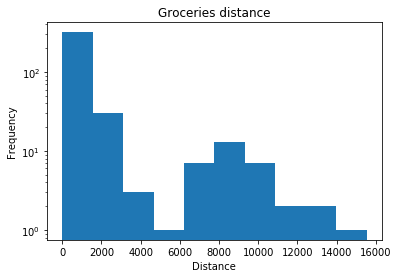

Cereals and potatoes
-------------


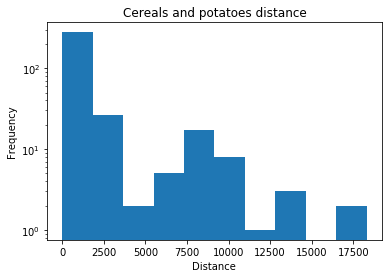

Sauces
-------------


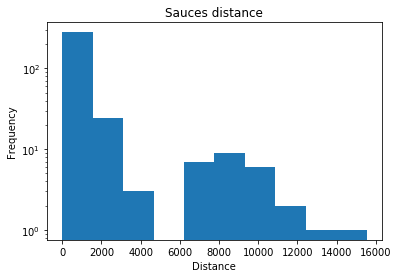

Biscuits and cakes
-------------


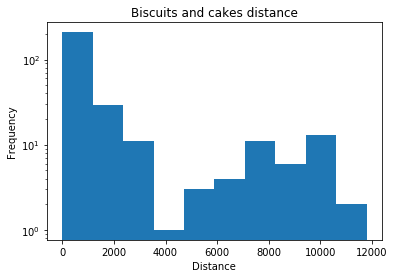

Plant-based beverages
-------------


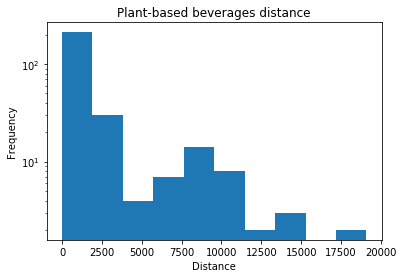

In [24]:
for category in list(largest.index):
    cat = merged[merged[0]==category]
    print(category)
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    cat['distance'].plot.hist(bins=10,title=category+" distance",logy=True)
    plt.xlabel("Distance")
    plt.savefig("img/"+category+"_distance.png",bbox_inches="tight")
    print("-------------")
    plt.show()

C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Plant-based foods and beverages


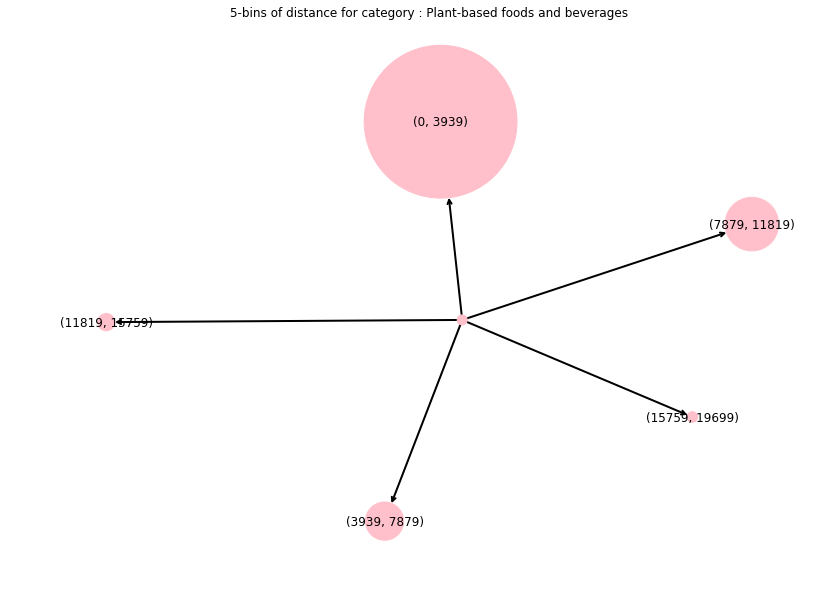

Plant-based foods


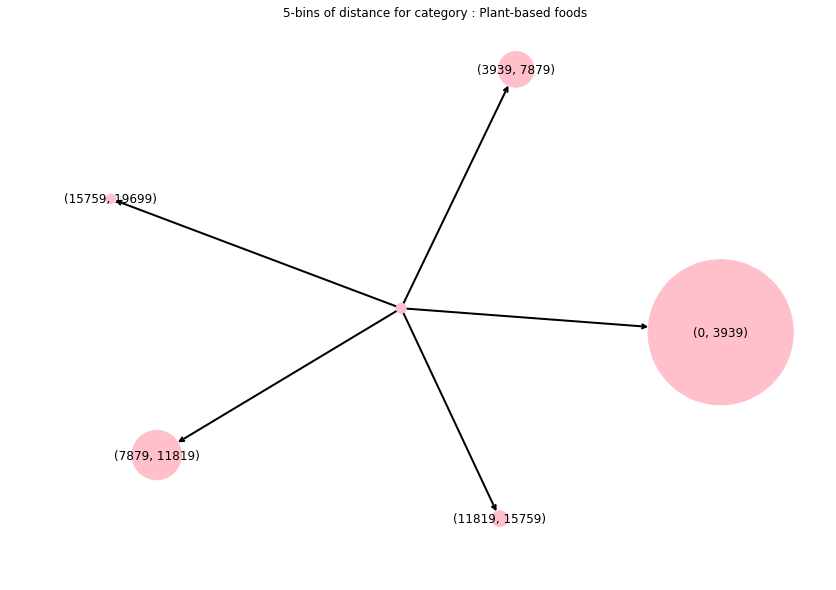

Sugary snacks


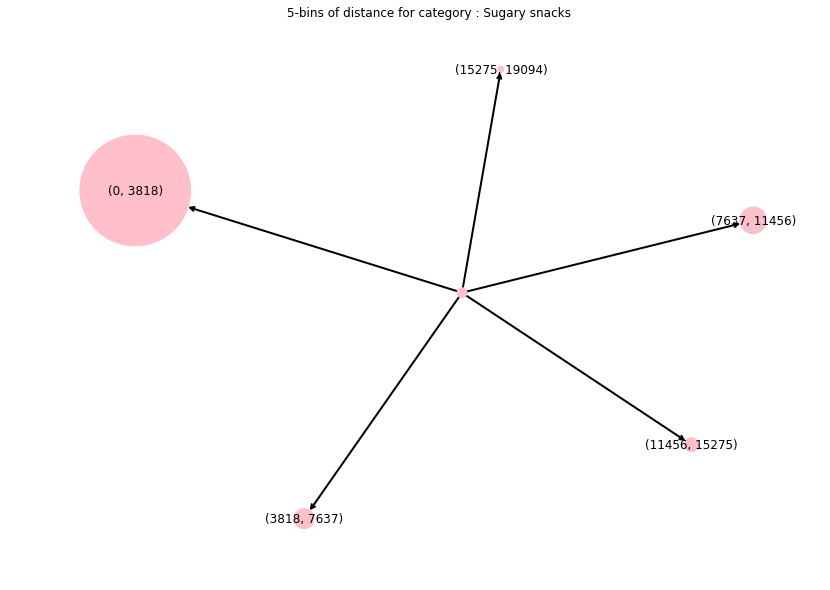

Beverages


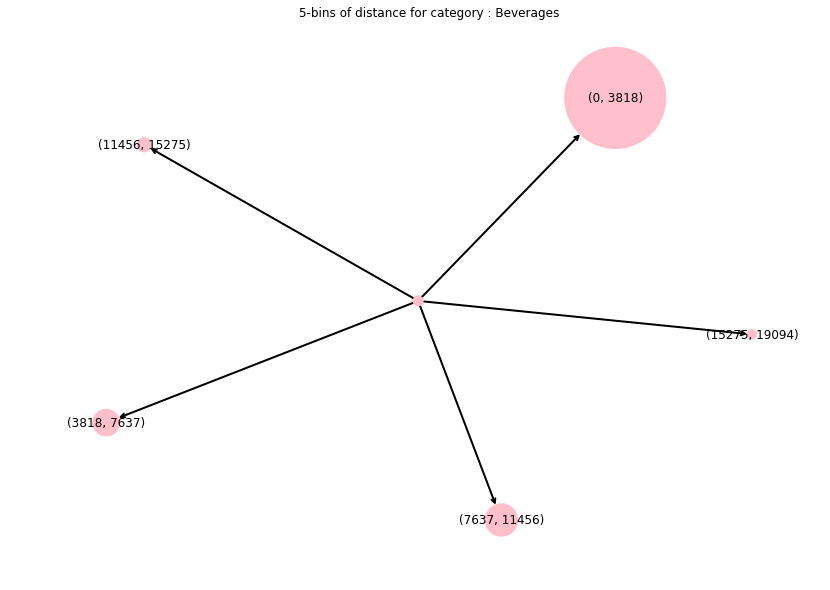

Dairies


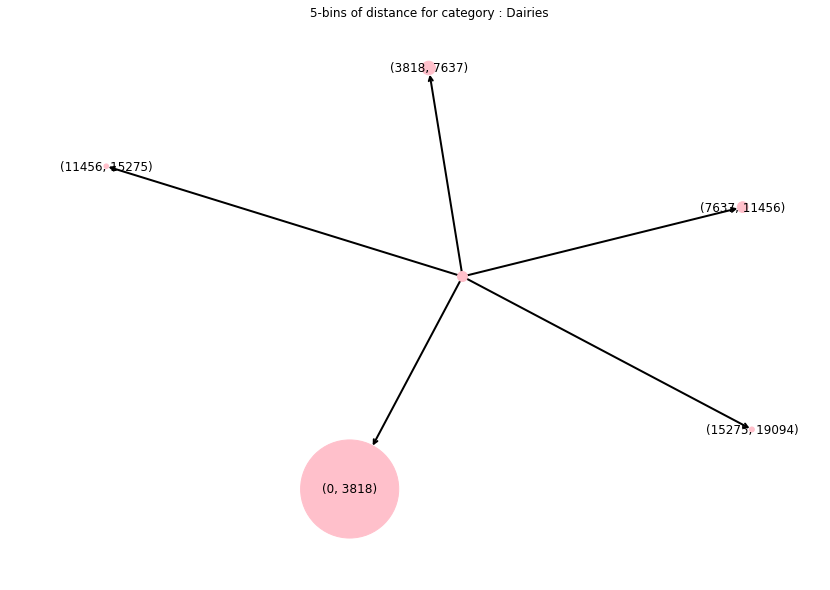

Meals


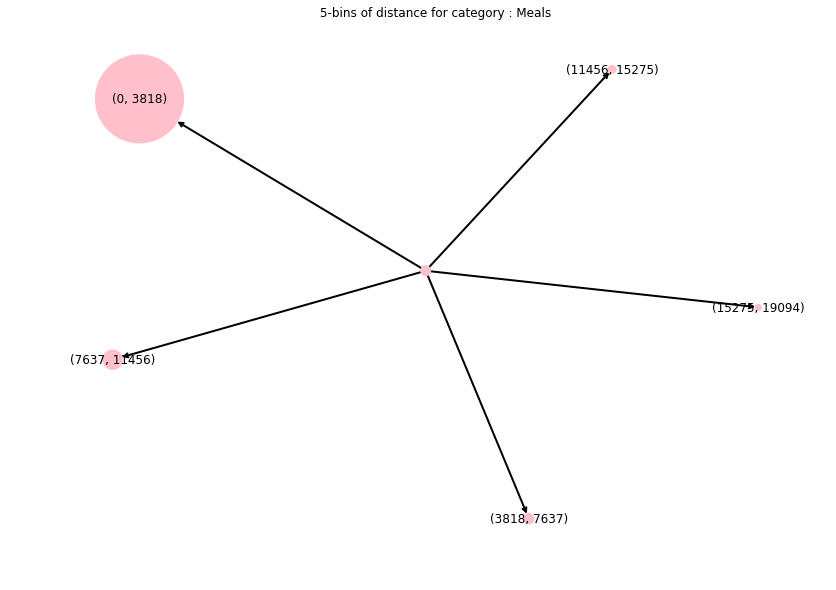

Fruits and vegetables based foods


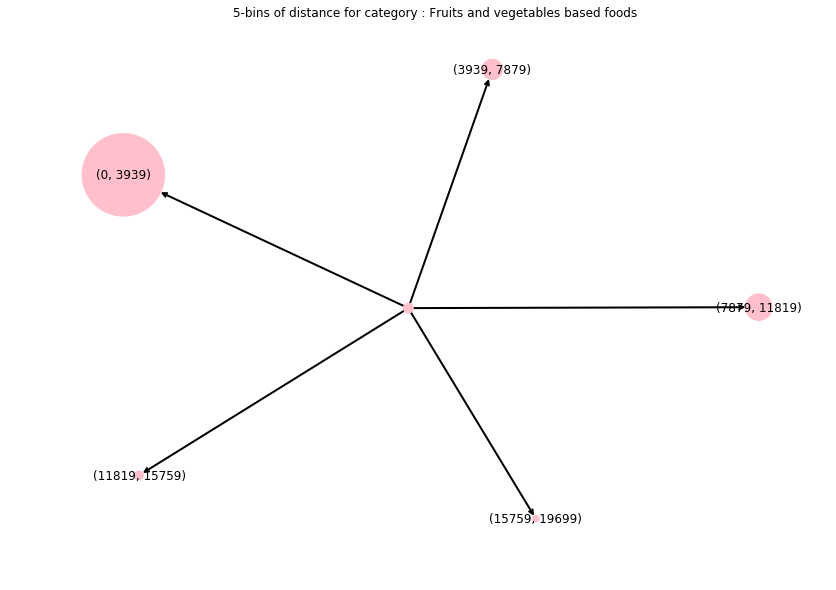

Cereals and potatoes


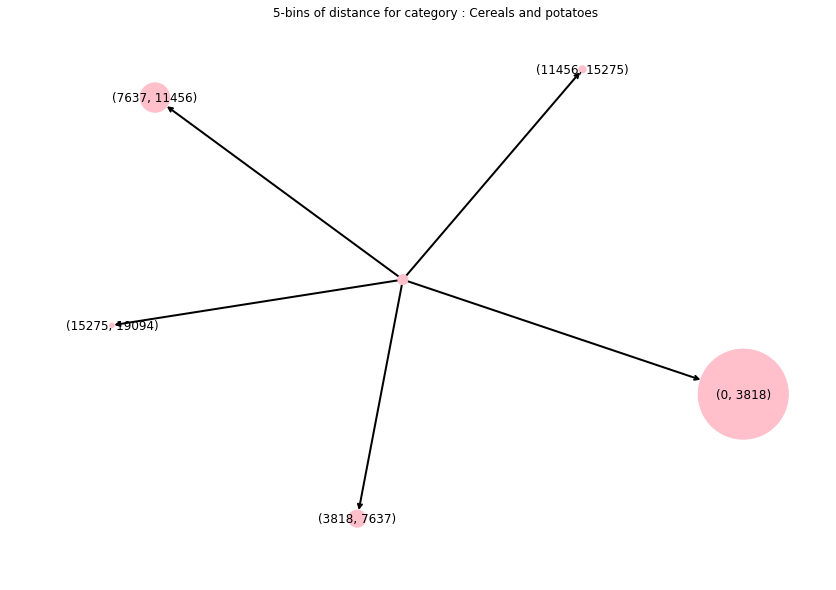

Meats


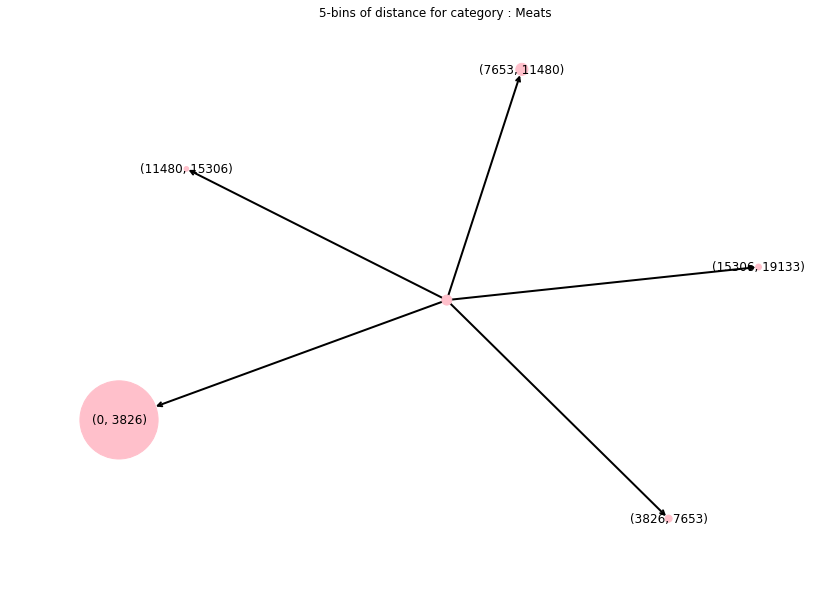

Fermented foods


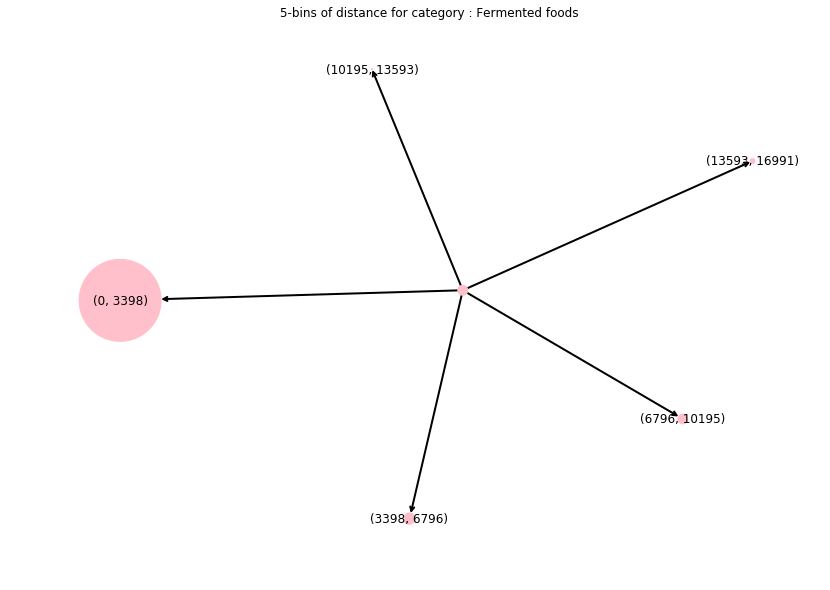

In [16]:
for category in largest.index:
    cat = merged[merged[0]==category]
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    print(category)
    count, division = np.histogram((cat['distance']),bins=5)
    ziped = list(zip(division.astype(int),division[1:].astype(int)))



    series = pd.Series(count)
    series.index = ziped
    do_star_graph_series(series,mode='node',title="5-bins of distance for category : "+category)
    plt.show()